In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
traffic_data = pd.read_csv("Traffic_Volume_Counts.csv")

In [72]:
traffic_data.shape

(42756, 31)

In [73]:
## Data Processing

# 1.1: handling missing values
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'],errors='coerce')

# 1.2 Filtering data specific to Broadway
broadway_data = traffic_data[traffic_data['Roadway Name'].str.contains("Broadway")]

In [74]:
## Feature Engineering

# 2.1: generating time features
broadway_data.loc[:, 'day_of_week'] = broadway_data['Date'].dt.dayofweek
broadway_data.loc[:, 'is_weekend'] = broadway_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
broadway_data.loc[:, 'month'] = broadway_data['Date'].dt.month

# 2.2: aggregating data
hourly_columns = [col for col in broadway_data.columns if 'AM' in col or 'PM' in col]
broadway_data.loc[:, 'daily_traffic_volume'] = broadway_data[hourly_columns].sum(axis=1)

# 2.3: selecting features
features = broadway_data[['day_of_week', 'is_weekend', 'month']]
target = broadway_data['daily_traffic_volume']

<ipython-input-74-738abfd24711>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadway_data.loc[:, 'day_of_week'] = broadway_data['Date'].dt.dayofweek
<ipython-input-74-738abfd24711>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadway_data.loc[:, 'is_weekend'] = broadway_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
<ipython-input-74-738abfd24711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

count      423.000000
mean     10619.848700
std       5311.714444
min       2130.000000
25%       7140.000000
50%       9791.000000
75%      12414.000000
max      28498.000000
Name: daily_traffic_volume, dtype: float64


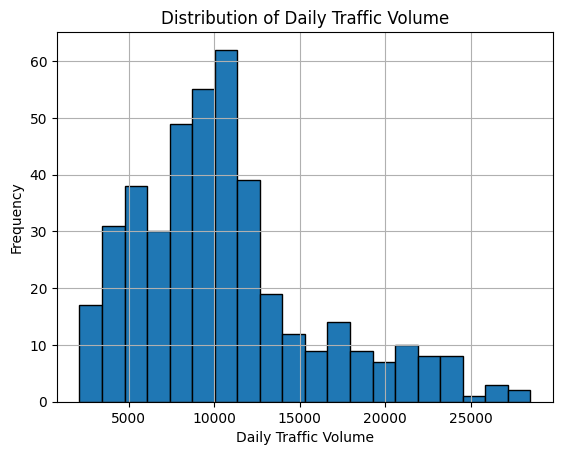

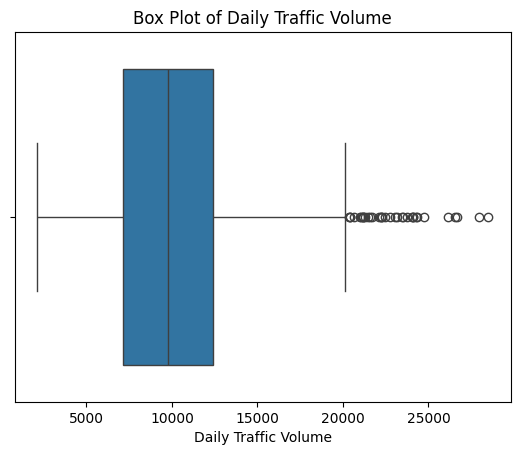

In [75]:
# 3 Visualization to see if scaling is necessary

print(broadway_data["daily_traffic_volume"].describe())

broadway_data['daily_traffic_volume'].hist(bins=20,edgecolor='black')
plt.title('Distribution of Daily Traffic Volume')
plt.xlabel('Daily Traffic Volume')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=broadway_data['daily_traffic_volume'])
plt.title('Box Plot of Daily Traffic Volume')
plt.xlabel('Daily Traffic Volume')
plt.show()

In [76]:
# 4 data split using sklearn
X_train, X_test, y_train,y_test = train_test_split(features,target, train_size = 0.8,test_size=0.2, random_state=21)

In [78]:
# 5.1 linear regression model
reg_model= LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print("Linear Regression Model Metrics:")
print("Mean Squared Error:",mse)
print("R-squared:", r2)

# 5.2 logistic regression model
low_threshold = target.quantile(0.25)
high_threshold = target.quantile(0.75)
print("Low threshold: ")
print(low_threshold)
print("High threshold: ")
print(high_threshold)

# categorizing the traffic volume for classification in logistic regression model
y_train_categorized =pd.cut(y_train, bins=[0, low_threshold, high_threshold, float('inf')], labels=['Low', 'Medium', 'High'])
y_test_categorized = pd.cut(y_test, bins=[0, low_threshold, high_threshold, float('inf')], labels=['Low', 'Medium', 'High'])

log_reg_model= LogisticRegression()
log_reg_model.fit(X_train, y_train_categorized)
y_pred_class= log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test_categorized, y_pred_class)
class_report =classification_report(y_test_categorized, y_pred_class)

print("Logistic Regression Model Metrics:")
print("Accuracy:", accuracy)
print(class_report)

Linear Regression Model Metrics:
Mean Squared Error: 26653726.83142919
R-squared: 0.02097216803475599
Low threshold: 
7140.0
High threshold: 
12414.0
Logistic Regression Model Metrics:
Accuracy: 0.4470588235294118
              precision    recall  f1-score   support

        High       0.33      0.12      0.18        25
         Low       0.00      0.00      0.00        20
      Medium       0.46      0.88      0.60        40

    accuracy                           0.45        85
   macro avg       0.26      0.33      0.26        85
weighted avg       0.31      0.45      0.34        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
